In [34]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path

In [2]:
# sns settings
sns.set_palette("Set2")
sns.set_style("whitegrid")


In [3]:
loss_files_folder = Path("./loss_logs")

In [60]:
COLUMN_NAMES = ["Epochs", "CurrentEpoch", "K", "Shape", "Generator Loss", "Generator Accuracy", "Discriminator Loss", "Discriminator Accuracy"]

In [61]:
loss_small = pd.read_csv((loss_files_folder / "ganblr_0_10_(9994, 11).csv"), header=None, delimiter=";", names=COLUMN_NAMES, index_col=False)

C:\Users\FelixScheffler\AppData\Local\Temp\ipykernel_15676\1594426925.py:1: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  loss_small = pd.read_csv((loss_files_folder / "ganblr_0_10_(9994, 11).csv"), header=None, delimiter=";", names=COLUMN_NAMES, index_col=False)


In [62]:
loss_small.head()

,Epochs,CurrentEpoch,K,Shape,Generator Loss,Generator Accuracy,Discriminator Loss,Discriminator Accuracy
0,10,0,0,"(9994, 11)",0.8934380412101746,0.932159,15.496679,0.490619
1,10,1,0,"(9994, 11)",2.125880479812622,0.933260,2.882089,0.529456
2,10,2,0,"(9994, 11)",2.3305697441101074,0.938163,3.154660,0.563852
3,10,3,0,"(9994, 11)",1.142678141593933,0.945367,13.004068,0.461226
4,10,4,0,"(9994, 11)",3.7335245609283447,0.952672,4.116078,0.563790


In [63]:
def get_dataset_name(tuple):
    dsets = {
        (9994, 11): "Superstore",
        (8124, 23): "Mushroom",
        (28638,11): "Credit Risk",
    }

    return dsets[tuple]


In [89]:
def create_graph_from_csv(file_path, to_plot = "Loss", from_compontent = "Generator", ax=None):
    frame = pd.read_csv(file_path, header=None, delimiter=";", names=COLUMN_NAMES, index_col=False)

    if to_plot == "Loss" and from_compontent == "Generator":
        # remove possible inf values
        frame = frame.replace([np.inf, -np.inf], 0)

        # cast column to float
        frame["Generator Loss"] = frame["Generator Loss"].astype(float)
    
    frame = frame[:frame["Epochs"][1]]
    
    sns.lineplot(x="CurrentEpoch", y=f"{from_compontent} {to_plot}", data=frame, ax=ax)

    ax.set(xlabel="Epochs", ylabel=f"{to_plot.capitalize()} of {from_compontent.capitalize()}")
    

C:\Users\FelixScheffler\AppData\Local\Temp\ipykernel_15676\2197243368.py:2: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  frame = pd.read_csv(file_path, header=None, delimiter=";", names=COLUMN_NAMES, index_col=False)
C:\Users\FelixScheffler\AppData\Local\Temp\ipykernel_15676\2197243368.py:2: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  frame = pd.read_csv(file_path, header=None, delimiter=";", names=COLUMN_NAMES, index_col=False)


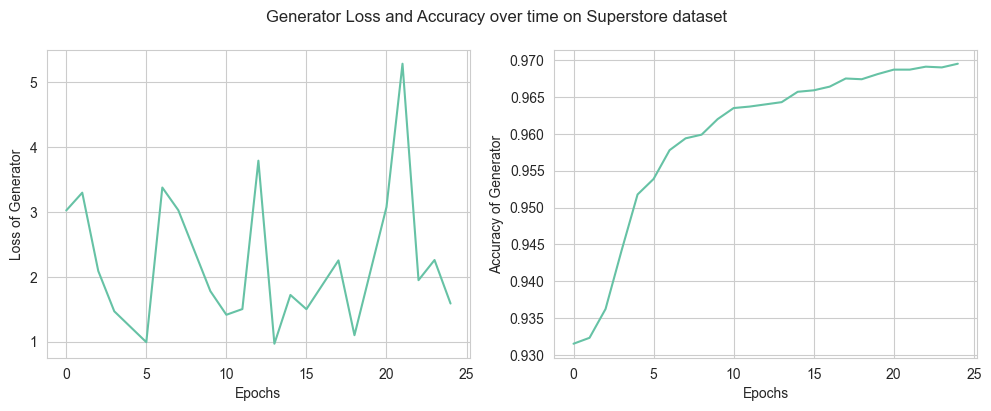

In [93]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

create_graph_from_csv(loss_files_folder / "ganblr_0_25_(9994, 11).csv", to_plot="Loss", from_compontent="Generator", ax=ax1)
create_graph_from_csv(loss_files_folder / "ganblr_0_25_(9994, 11).csv", to_plot="Accuracy", from_compontent="Generator", ax=ax2)

fig.suptitle("Generator Loss and Accuracy over time on Superstore dataset")

fig.savefig("graphs/superstore_loss_hist_25_0.png")

plt.show()

C:\Users\FelixScheffler\AppData\Local\Temp\ipykernel_15676\2197243368.py:2: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  frame = pd.read_csv(file_path, header=None, delimiter=";", names=COLUMN_NAMES, index_col=False)
C:\Users\FelixScheffler\AppData\Local\Temp\ipykernel_15676\2197243368.py:2: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  frame = pd.read_csv(file_path, header=None, delimiter=";", names=COLUMN_NAMES, index_col=False)


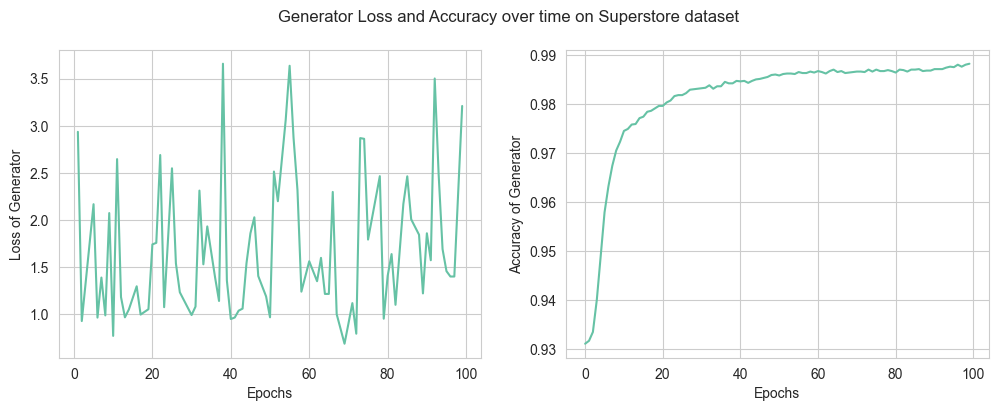

In [94]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

create_graph_from_csv(loss_files_folder / "ganblr_1_100_(9994, 11).csv", to_plot="Loss", from_compontent="Generator", ax=ax1)
create_graph_from_csv(loss_files_folder / "ganblr_1_100_(9994, 11).csv", to_plot="Accuracy", from_compontent="Generator", ax=ax2)

fig.suptitle("Generator Loss and Accuracy over time on Superstore dataset")

fig.savefig("graphs/superstore_loss_hist_100_1.png")
plt.show()